## TSF Data Science & Business Analysis Internship Task 4

### by Pushkar Khare

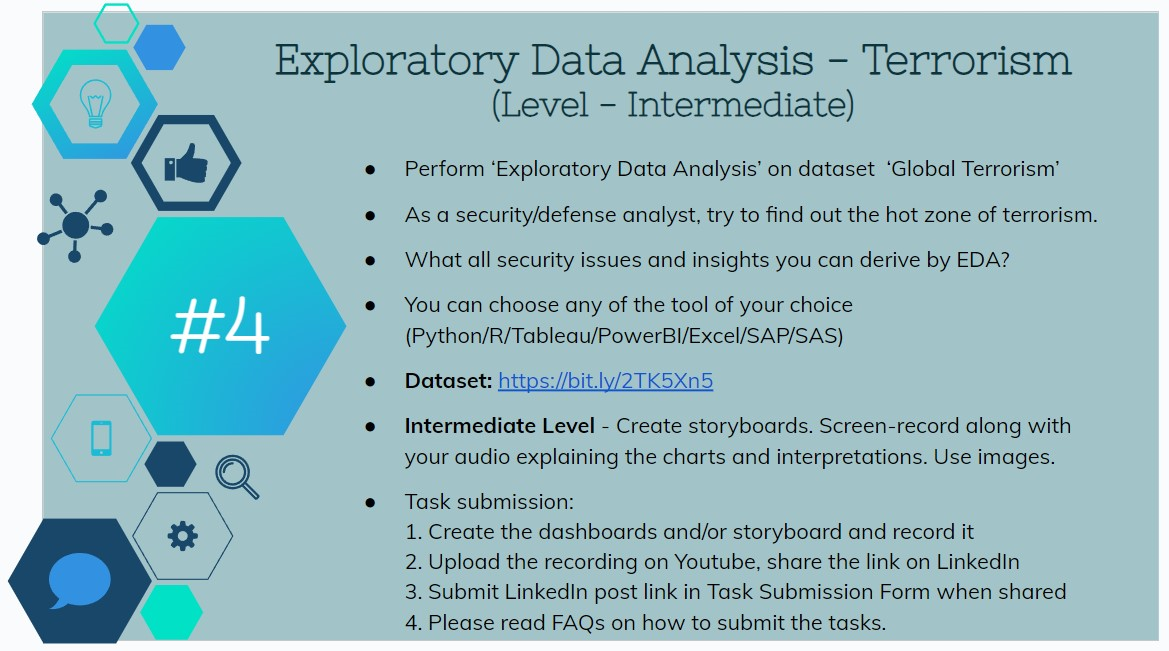

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin-1')

C:\Users\pushk\AppData\Local\Temp\ipykernel_12596\1807700778.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin-1')


In [3]:
df.shape

(181691, 135)

In [4]:
df.sample(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
125775,201401110059,2014,1,11,NaN,0,NaN,228,Yemen,10,Middle East & North Africa,Al Jawf,Al-Jawf,16.597222,45.524167,4.0,0,NaN,01/11/2014: Assailants opened fire on the gove...,1,1,1,0.0,NaN,NaN,0.0,0,0,1,Assassination,NaN,NaN,NaN,NaN,2,Government (General),15.0,Politician or Political Party Movement/Meeting...,Government of Al Jawf,Governor: Mohammad Salem Ben Abod,228.0,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tribesmen,NaN,NaN,NaN,NaN,NaN,"The specific motive is unknown; however, sourc...",0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,The governor's vehicle was damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Yemen: Armed Tribesmen Besiege Oil Companies ...","""Yemen's governor of Al-Jawf escapes assassi...",NaN,START Primary Collection,-9,-9,0,-9,NaN
56277,199405130010,1994,5,13,NaN,0,NaN,60,Egypt,10,Middle East & North Africa,Unknown,Southern Egypt,NaN,NaN,5.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Police,two policemen,60.0,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Gama'at al-Islamiyya (IG),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,3.0,Handgun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pistol,2.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,0,1,NaN
130629,201404200026,2014,4,20,NaN,0,NaN,95,Iraq,10,Middle East & North Africa,Babil,Rasheed,33.117836,44.369362,1.0,0,NaN,04/20/2014: An explosive device detonated amon...,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Not Applicable,Civilians,95.0,Iraq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.0,6.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Attacks kill at least 18 people in Iraq,"" T...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
126642,201401300058,2014,1,30,2014-01-30 00:00:00,0,NaN,95,Iraq,10,Middle East & North Africa,Saladin,Unknown,34.502030,43.532467,4.0,0

In [5]:
cols_with_null_values = (df.isna().sum() / len(df)) * 100  # Calculate the percentage of null values

In [6]:
pd.set_option('display.max_rows', None)
cols_with_null_values

eventid                0.000000
iyear                  0.000000
imonth                 0.000000
iday                   0.000000
approxdate            94.914993
extended               0.000000
resolution            98.778145
country                0.000000
country_txt            0.000000
region                 0.000000
region_txt             0.000000
provstate              0.231712
city                   0.239417
latitude               2.507554
longitude              2.508104
specificity            0.003302
vicinity               0.000000
location              69.456385
summary               36.396409
crit1                  0.000000
crit2                  0.000000
crit3                  0.000000
doubtterr              0.000550
alternative           84.032781
alternative_txt       84.032781
multiple               0.000550
success                0.000000
suicide                0.000000
attacktype1            0.000000
attacktype1_txt        0.000000
attacktype2           96.524869
attackty

In [9]:

# Filter columns with more than 50% null values and drop them
cols_to_drop = cols_with_null_values[cols_with_null_values > 50]
df = df.drop(cols_to_drop.index, axis=1)

In [10]:
df.shape

(181691, 58)

In [11]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [12]:
df.sample(5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
95479,201002220034,2010,2,22,0,95,Iraq,10,Middle East & North Africa,Baghdad,Baghdad,33.303566,44.371773,1.0,0,"02/22/2010: On Monday, in northern Baghdad, Ir...",1,1,1,0.0,0.0,1,0,2,Armed Assault,2,Government (General),18.0,"Government Personnel (excluding police, military)",Iraqi Ministry of Defense,A convoy of Ministry Defense workers was targe...,95.0,Iraq,Unknown,0.0,0,-99.0,0.0,0.0,5,Firearms,5.0,Unknown Gun Type,Unknown firearms were used in the attack.,2.0,0.0,0.0,0.0,0.0,0.0,-9,0.0,"Reuters, ""FACTBOX-Security Developments in Ira...",ISVG,-9,-9,0,-9
107330,201204260038,2012,4,26,0,4,Afghanistan,6,South Asia,Kandahar,Pashmul,31.555833,65.433056,1.0,0,04/26/2012: An explosive device detonated near...,1,1,0,1.0,0.0,1,0,3,Bombing/Explosion,4,Military,37.0,NATO,North Atlantic Treaty Organization (NATO): Int...,Soldiers,422.0,International,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,8.0,Landmine,A roadside bomb was used in the attack.,0.0,0.0,0.0,6.0,NaN,0.0,1,0.0,"""3 foreign troops among 6 injured in roadside ...",START Primary Collection,-9,-9,1,1
132569,201405280018,2014,5,28,1,41,Central African Republic,11,Sub-Saharan Africa,Bangui,Bangui,4.374740,18.551292,1.0,0,05/28/2014: Assailants threw grenades and open...,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),15,Religious Figures/Institutions,86.0,Place of Worship,Notre Dame de Fatima Church,Catholic Church,41.0,Central African Republic,Seleka,0.0,0,-99.0,0.0,0.0,6,Explosives,7.0,Grenade,NaN,30.0,0.0,0.0,NaN,0.0,0.0,1,1.0,"""Muslim rebels attack Central African Rep....",START Primary Collection,0,0,0,0
138098,201409210056,2014,9,21,0,60,Egypt,10,Middle East & North Africa,Gharbia,Tanta,30.787678,30.999529,1.0,0,09/21/2014: An explosive device detonated near...,1,1,1,0.0,1.0,1,0,3,Bombing/Explosion,14,Private Citizens & Property,74.0,Marketplace/Plaza/Square,Al-Galaa Square,Square,60.0,Egypt,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-9,0.0,"""Four simultaneous bomb blasts in Tanta and Ma...",START Primary Collection,-9,-9,0,-9
80457,200604120012,2006,4,12,0,130,Mexico,1,North America,Tamaulipas (State),Nuevo Laredo,27.480024,-99.510535,1.0,0,04/12/2006: Hit men armed with assault rifles ...,0,1,1,1.0,0.0,1,0,2,Armed Assault,14,Private Citizens & Property,73.0,Vehicles/Transportation,Citizenry of Nuevo Laredo,Men driving through Nuevo Laredo,130.0,Mexico,Unknown,0.0,0,NaN,0.0,-9.0,5,Firearms,5.0,Unknown Gun Type,NaN,4.0,0.0,0.0,3.0,0.0,0.0,0,0.0,Drug gang violence again strikes Mexico; 4 me...,CETIS,-9,-9,0,-9


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 58 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181256 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  summary           115562 non-null  object 
 16  crit1             18

In [14]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,181690.000000,181691.000000,181691.000000,181691.000000,181691.000000,171318.000000,180132.000000,181311.000000,181691.000000,110576.000000,112202.000000,115571.000000,181691.000000,160923.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,181513.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,0.137773,0.889598,0.036507,3.247547,8.439719,46.971474,127.686441,0.081440,0.002950,-65.361154,-1.517727,0.049666,6.447325,11.117162,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,0.059054,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.344663,0.313391,0.187549,1.915772,6.653838,30.953357,89.299120,0.273511,0.054234,216.536633,12.830346,1.093195,2.173435,6.495612,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.461244,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,22.000000,83.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,4.000000,35.000000,101.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,6.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,14.000000,74.000000,173.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000,16.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,113.000000,1004.000000,1.000000,1.000000,25000.000000,406.000000,1.000000,13.000000,31.000000,1570.000000,1360.000000,500.000000,8191.000000,751.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.duplicated().sum()

0

In [16]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [17]:
df = df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','extended','Group','Target_type','Weapon_type']]

In [18]:
df.sample(5)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,extended,Group,Target_type,Weapon_type
107054,2012,4,15,Sri Lanka,South Asia,Batticaloa,7.733107,81.688820,Bombing/Explosion,0.0,0.0,Engineer: Ilangowan Kanthdeepa,0,Unknown,Government (Diplomatic),Explosives
72098,2001,3,27,Somalia,Sub-Saharan Africa,Mogadishu,2.059819,45.326115,Armed Assault,0.0,0.0,United Nations employees touring the Medecins ...,0,Supporters of Muse Sudi Yalahow,Government (Diplomatic),Firearms
155378,2015,11,12,Philippines,Southeast Asia,Sibagat district,8.822313,125.693318,Facility/Infrastructure Attack,0.0,0.0,Lumad Indigenous School,0,New People's Army (NPA),Educational Institution,Incendiary
105493,2012,1,31,Iraq,Middle East & North Africa,Muqdadiyah,33.953167,44.921906,Armed Assault,0.0,2.0,Checkpoint,0,Unknown,Police,Firearms
40896,1989,12,11,Sri Lanka,South Asia,Kebethegollawa,8.641085,80.669598,Armed Assault,0.0,0.0,"Office, Assistant Govt. Agent",0,People's Liberation Front (JVP),Government (General),Firearms


In [20]:
df.shape

(181691, 16)

In [19]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
city             435
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Target           638
extended           0
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [21]:
df = df.dropna()

df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
Region         0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
extended       0
Group          0
Target_type    0
Weapon_type    0
dtype: int64

In [22]:
df.sample(5)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,extended,Group,Target_type,Weapon_type
123207,2013,11,9,Nepal,South Asia,Khokling,27.400000,87.650000,Bombing/Explosion,0.0,5.0,Rally,0,Communist Party of Nepal-Maoist (Baidya),Violent Political Party,Explosives
13749,1981,6,19,Guatemala,Central America & Caribbean,Guatemala City,14.622869,-90.529068,Bombing/Explosion,0.0,0.0,Street,0,31 January People's Front (FP-31),Private Citizens & Property,Explosives
119969,2013,8,6,Afghanistan,South Asia,Kalat,32.100204,66.901016,Bombing/Explosion,1.0,5.0,Commander: Mohibullah,0,Unknown,Police,Explosives
22924,1984,8,14,Peru,South America,Huaylas,-8.872222,-77.893611,Armed Assault,25.0,0.0,military unit,0,Shining Path (SL),Military,Firearms
99436,2010,12,11,Yemen,Middle East & North Africa,Lahij,13.063399,44.880882,Hostage Taking (Kidnapping),0.0,0.0,Yemeni soldiers,1,Southern Mobility Movement (Yemen),Military,Firearms


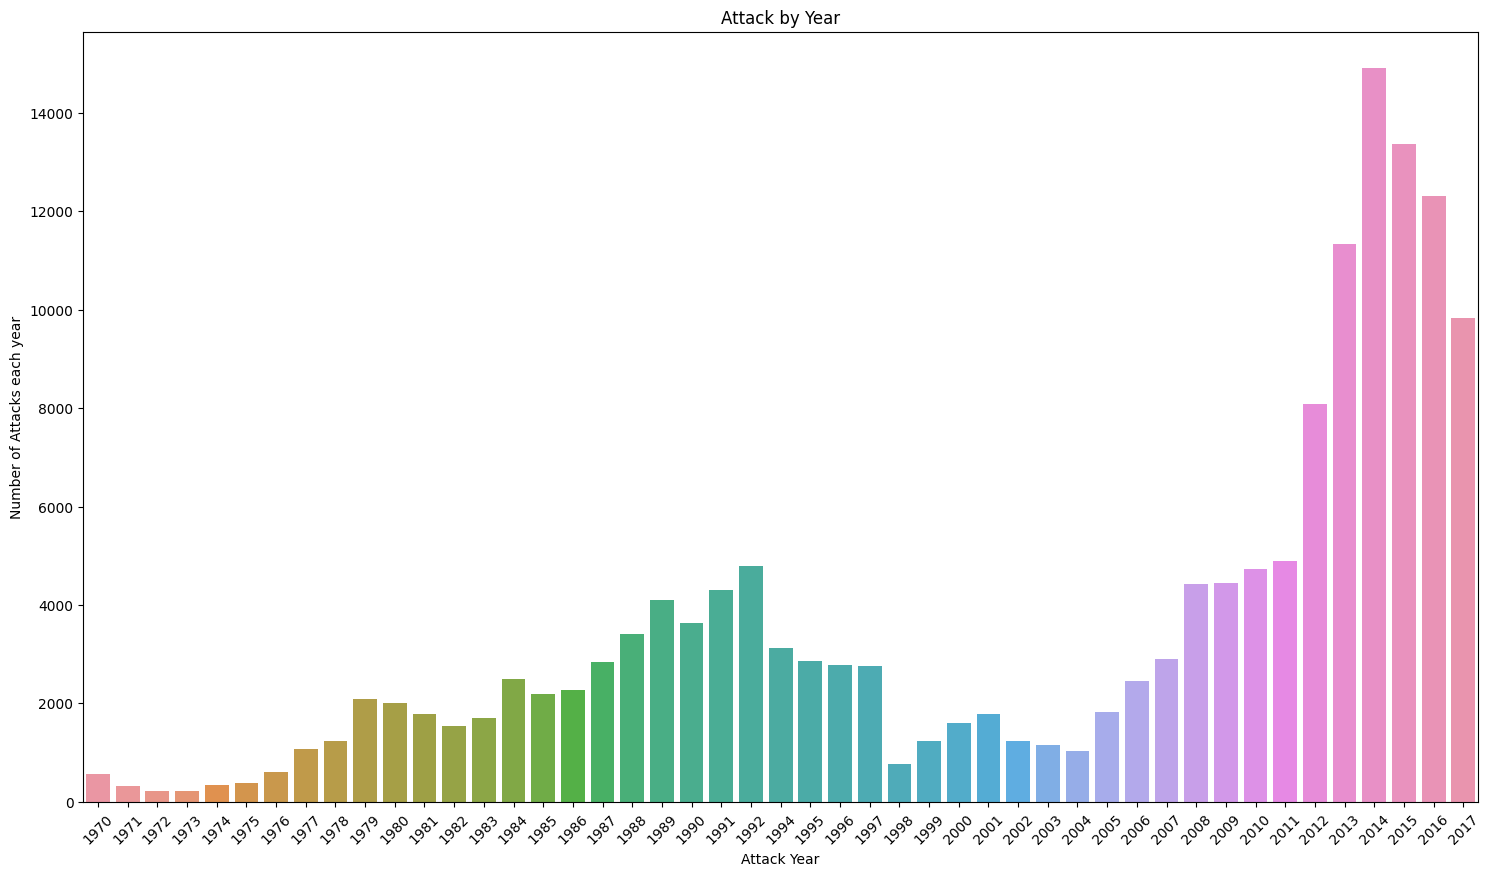

In [29]:
plt.figure(figsize=(18, 10))
sns.countplot(data=df, x='Year')
plt.xticks(rotation=45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack by Year')
plt.show()

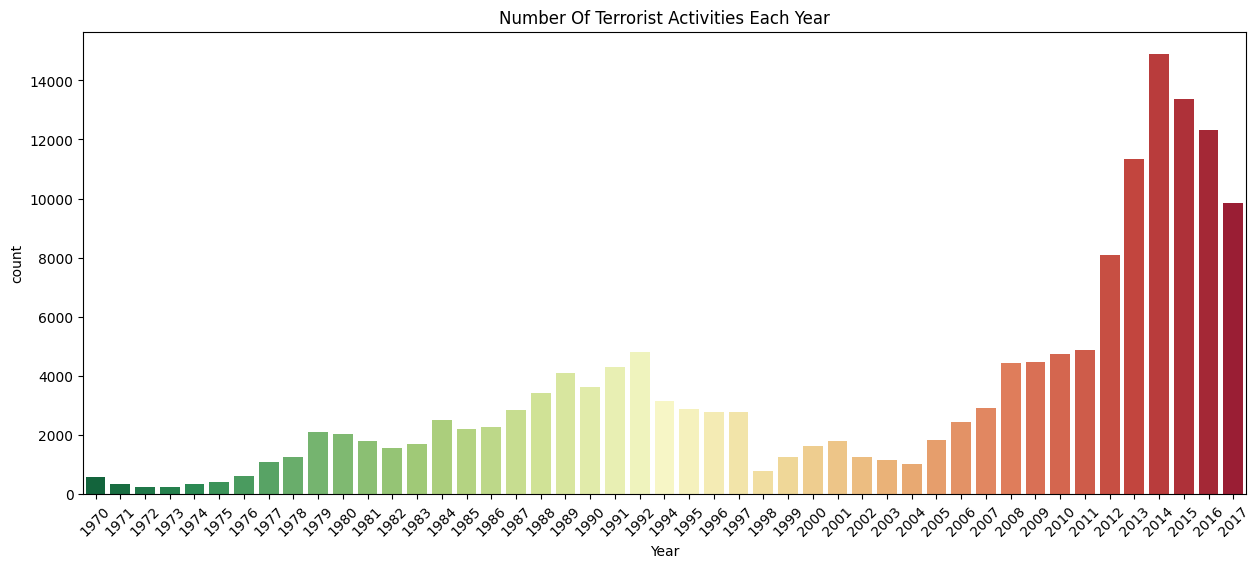

In [31]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='Year', data=df, palette='RdYlGn_r')
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

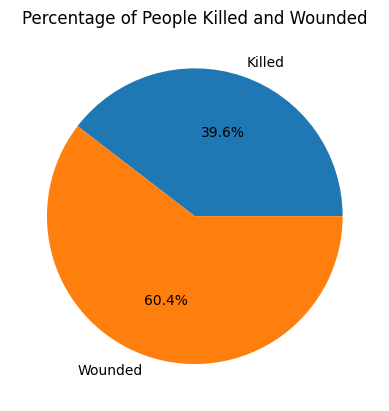

In [121]:
total_killed_and_wounded = df['Killed'].sum() + df['Wounded'].sum()

killed_percentage = df['Killed'].sum() / total_killed_and_wounded * 100
wounded_percentage = df['Wounded'].sum() / total_killed_and_wounded * 100

plt.pie([killed_percentage, wounded_percentage], labels=['Killed', 'Wounded'], autopct='%1.1f%%')
plt.title('Percentage of People Killed and Wounded')
plt.show()

In [122]:
casualties_by_year = df.groupby('Year')[['Killed', 'Wounded']].sum().reset_index()
casualties_by_year.head()

,Year,Killed,Wounded
0,1970,114.0,210.0
1,1971,35.0,82.0
2,1972,167.0,409.0
3,1973,121.0,475.0
4,1974,269.0,852.0


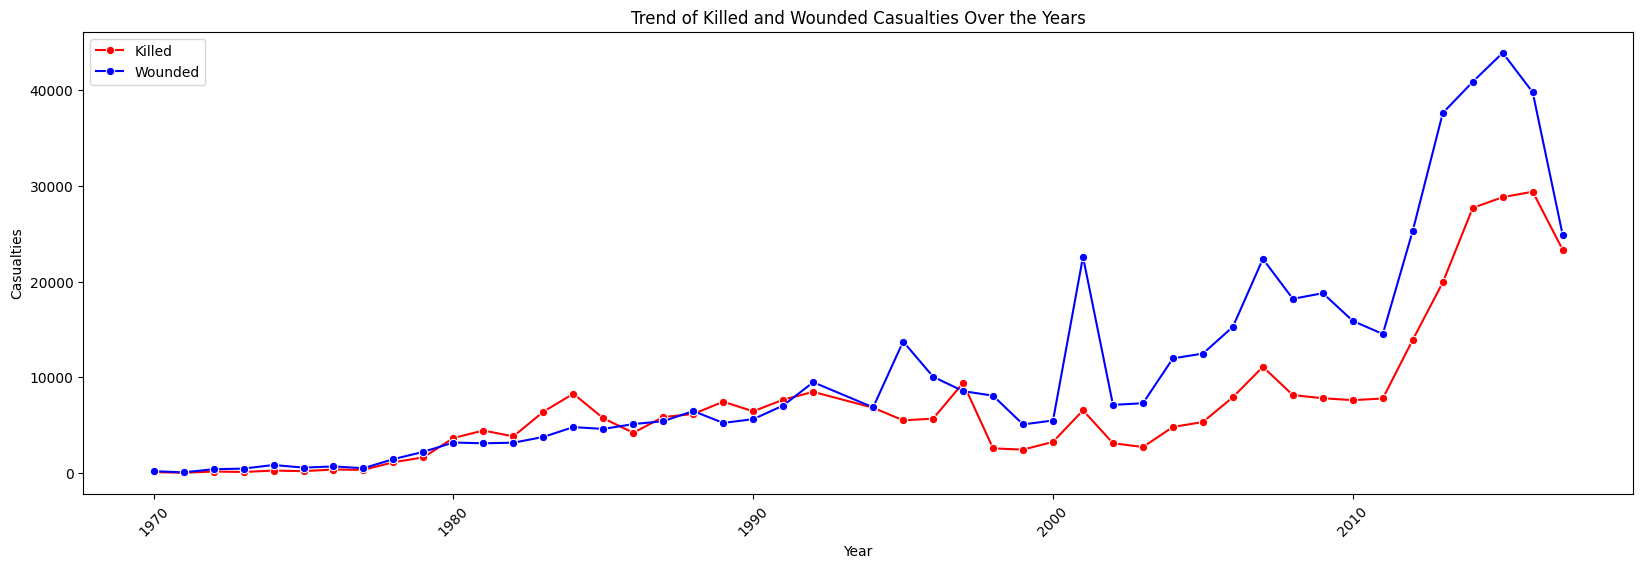

In [123]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=casualties_by_year, x='Year', y='Killed', label='Killed', marker='o', color='r')
sns.lineplot(data=casualties_by_year, x='Year', y='Wounded', label='Wounded', marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Casualties')
plt.title('Trend of Killed and Wounded Casualties Over the Years')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [124]:
pivot_table = df.pivot_table(index=['Year', 'Month'], values=['Killed'], aggfunc='sum').reset_index()

pivot_table.columns = ['Year', 'Month', 'Total_Killed']

# Display the pivot table
print(pivot_table)

     Year  Month  Total_Killed
0    1970      0           0.0
1    1970      1           2.0
2    1970      2          55.0
3    1970      3           5.0
4    1970      4           3.0
5    1970      5           6.0
6    1970      6           8.0
7    1970      7           7.0
8    1970      8          10.0
9    1970      9           7.0
10   1970     10           3.0
11   1970     11           7.0
12   1970     12           1.0
13   1971      1           4.0
14   1971      2           0.0
15   1971      3           0.0
16   1971      4          16.0
17   1971      5           4.0
18   1971      6           1.0
19   1971      7           1.0
20   1971      8           3.0
21   1971      9           4.0
22   1971     10           0.0
23   1971     11           2.0
24   1971     12           0.0
25   1972      0           0.0
26   1972      1           5.0
27   1972      2          15.0
28   1972      3           8.0
29   1972      4           2.0
30   1972      5          36.0
31   197

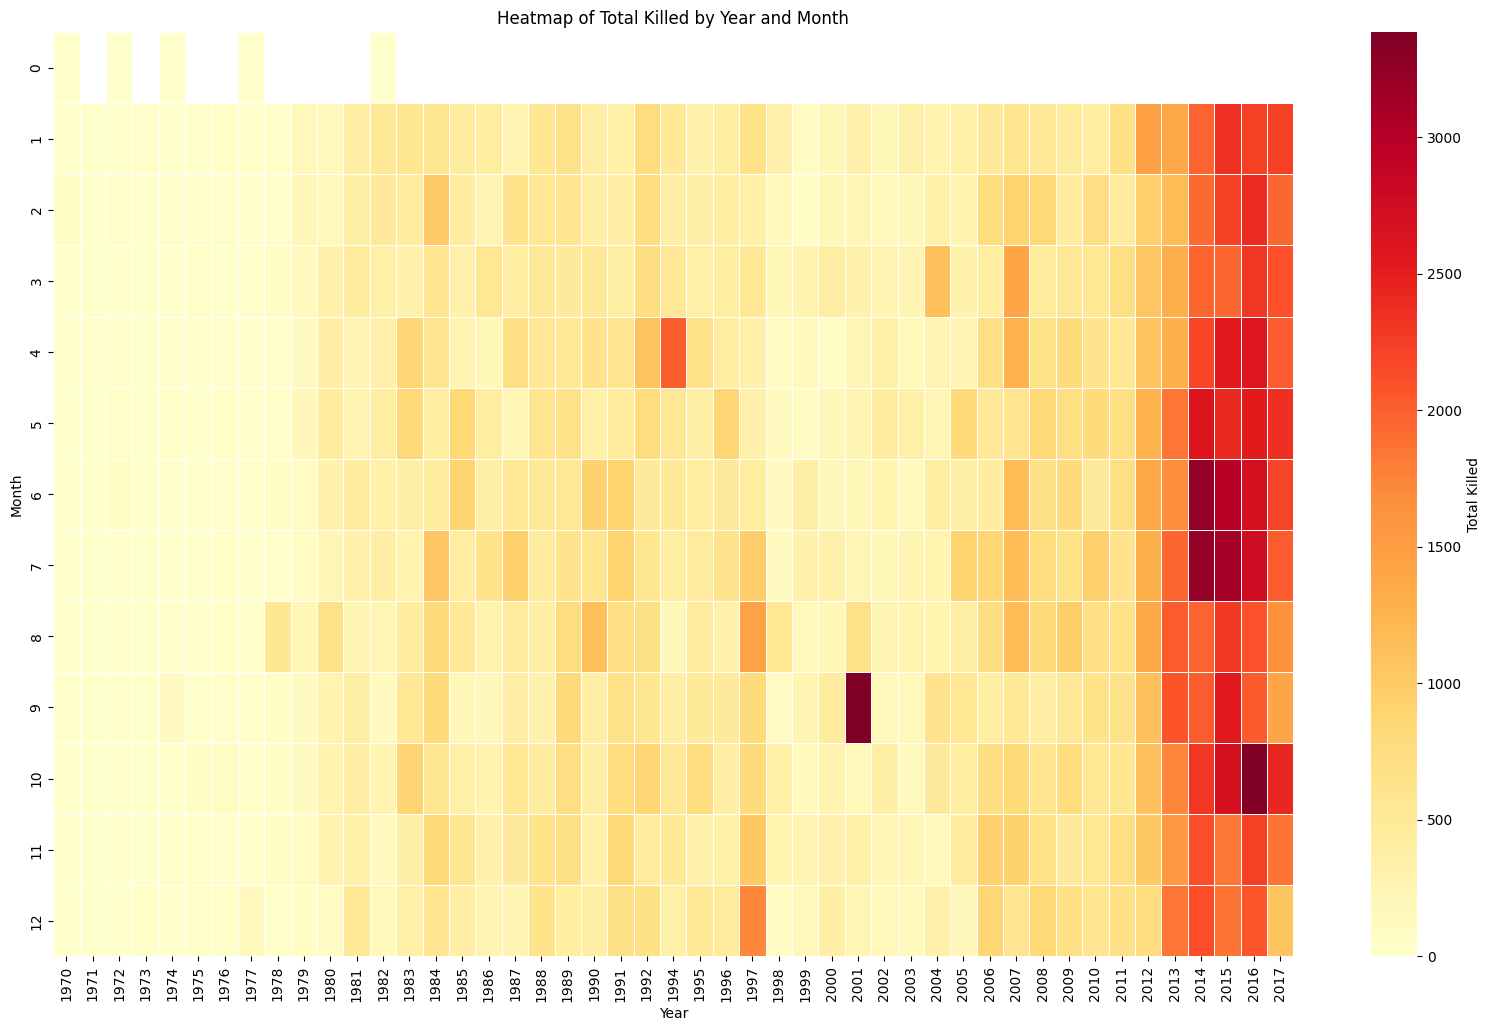

In [125]:
plt.figure(figsize=(20,12))
heatmap_data = pivot_table.pivot_table(values='Total_Killed', index='Month', columns='Year')
sns.heatmap(heatmap_data, cmap='YlOrRd', fmt='g', linewidths=.5, cbar_kws={'label': 'Total Killed'})
plt.title('Heatmap of Total Killed by Year and Month')
plt.show()

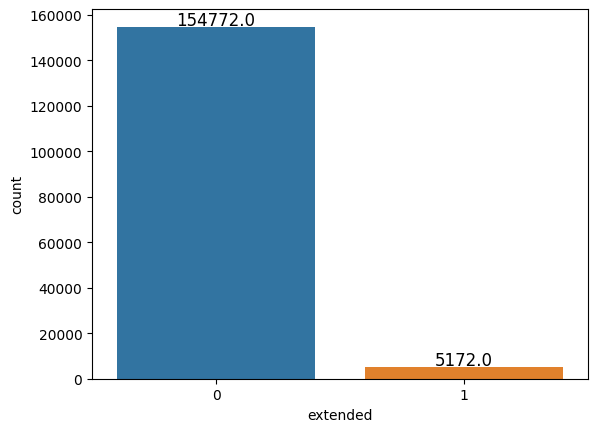

In [126]:
ax = sns.countplot(data=df, x='extended')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

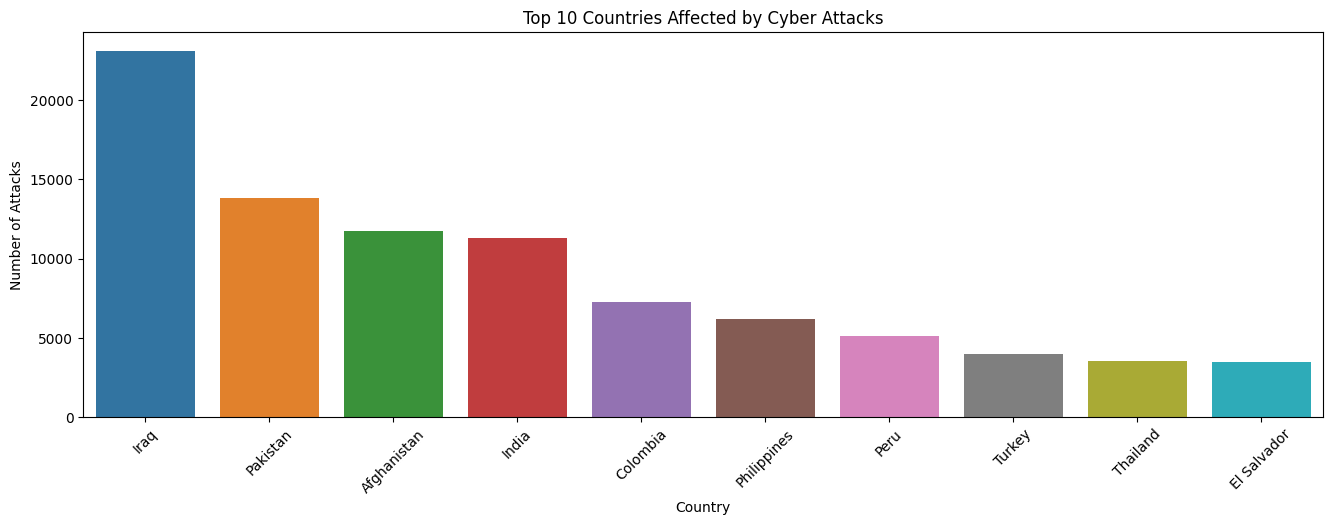

In [127]:
# Group by country
grouped_df = df.groupby('Country')

# Sort the groups by the number of attacks
grouped_df = grouped_df.size().sort_values(ascending=False)

# Get the top 10 countries
top_10_countries = grouped_df.index[:10]

# Create a bar chart of the top 10 countries
plt.figure(figsize=(16, 5))
sns.barplot(x=top_10_countries, y=grouped_df.loc[top_10_countries])
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Countries Affected by Cyber Attacks')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [128]:
casualty_data = df.groupby('Country')[['Killed', 'Wounded']].sum()
casualty_data.head(5)

,Killed,Wounded
Country,,
Afghanistan,35614.0,43832.0
Albania,42.0,117.0
Algeria,9318.0,8830.0
Angola,1847.0,2193.0
Argentina,395.0,739.0


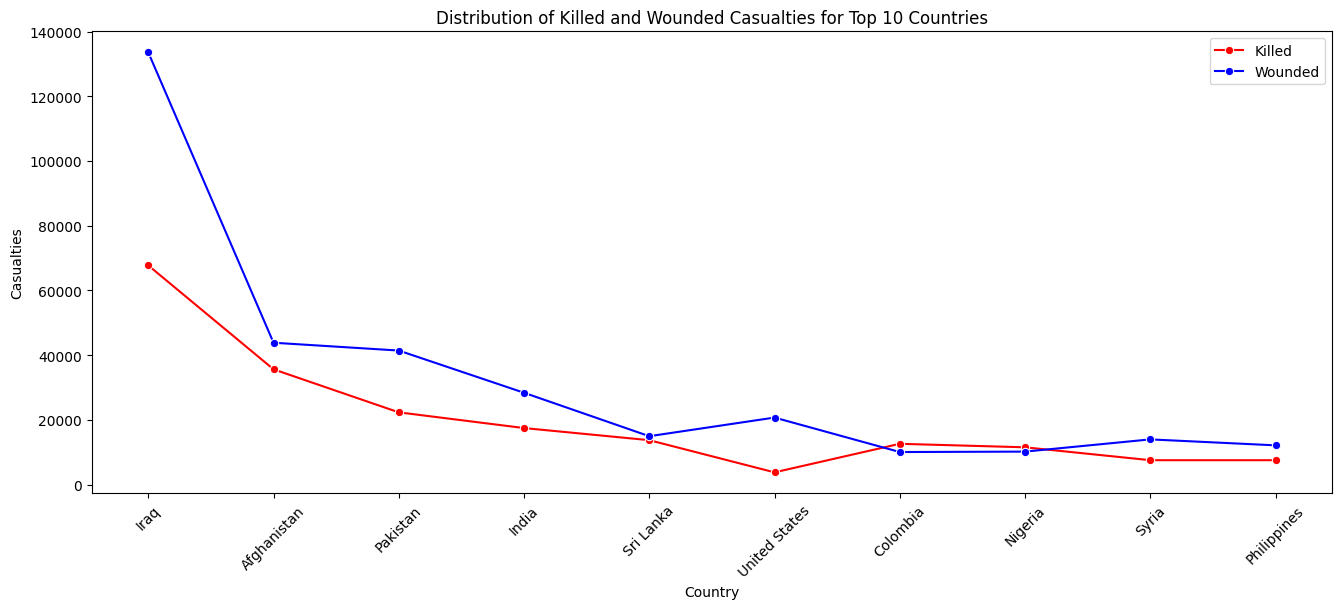

In [129]:
casualty_data['Total_Casualties'] = casualty_data['Killed'] + casualty_data['Wounded']

# Sort by total casualties and get the top 10 countries
top_10_countries = casualty_data.sort_values(by='Total_Casualties', ascending=False).head(10)

plt.figure(figsize=(16, 6))
sns.lineplot(data=top_10_countries, x=top_10_countries.index, y='Killed', marker='o', label='Killed', color='r')
sns.lineplot(data=top_10_countries, x=top_10_countries.index, y='Wounded', marker='o', label='Wounded', color='b')
plt.xlabel('Country')
plt.ylabel('Casualties')
plt.title('Distribution of Killed and Wounded Casualties for Top 10 Countries')
plt.legend()
plt.xticks(rotation=45)

plt.show()

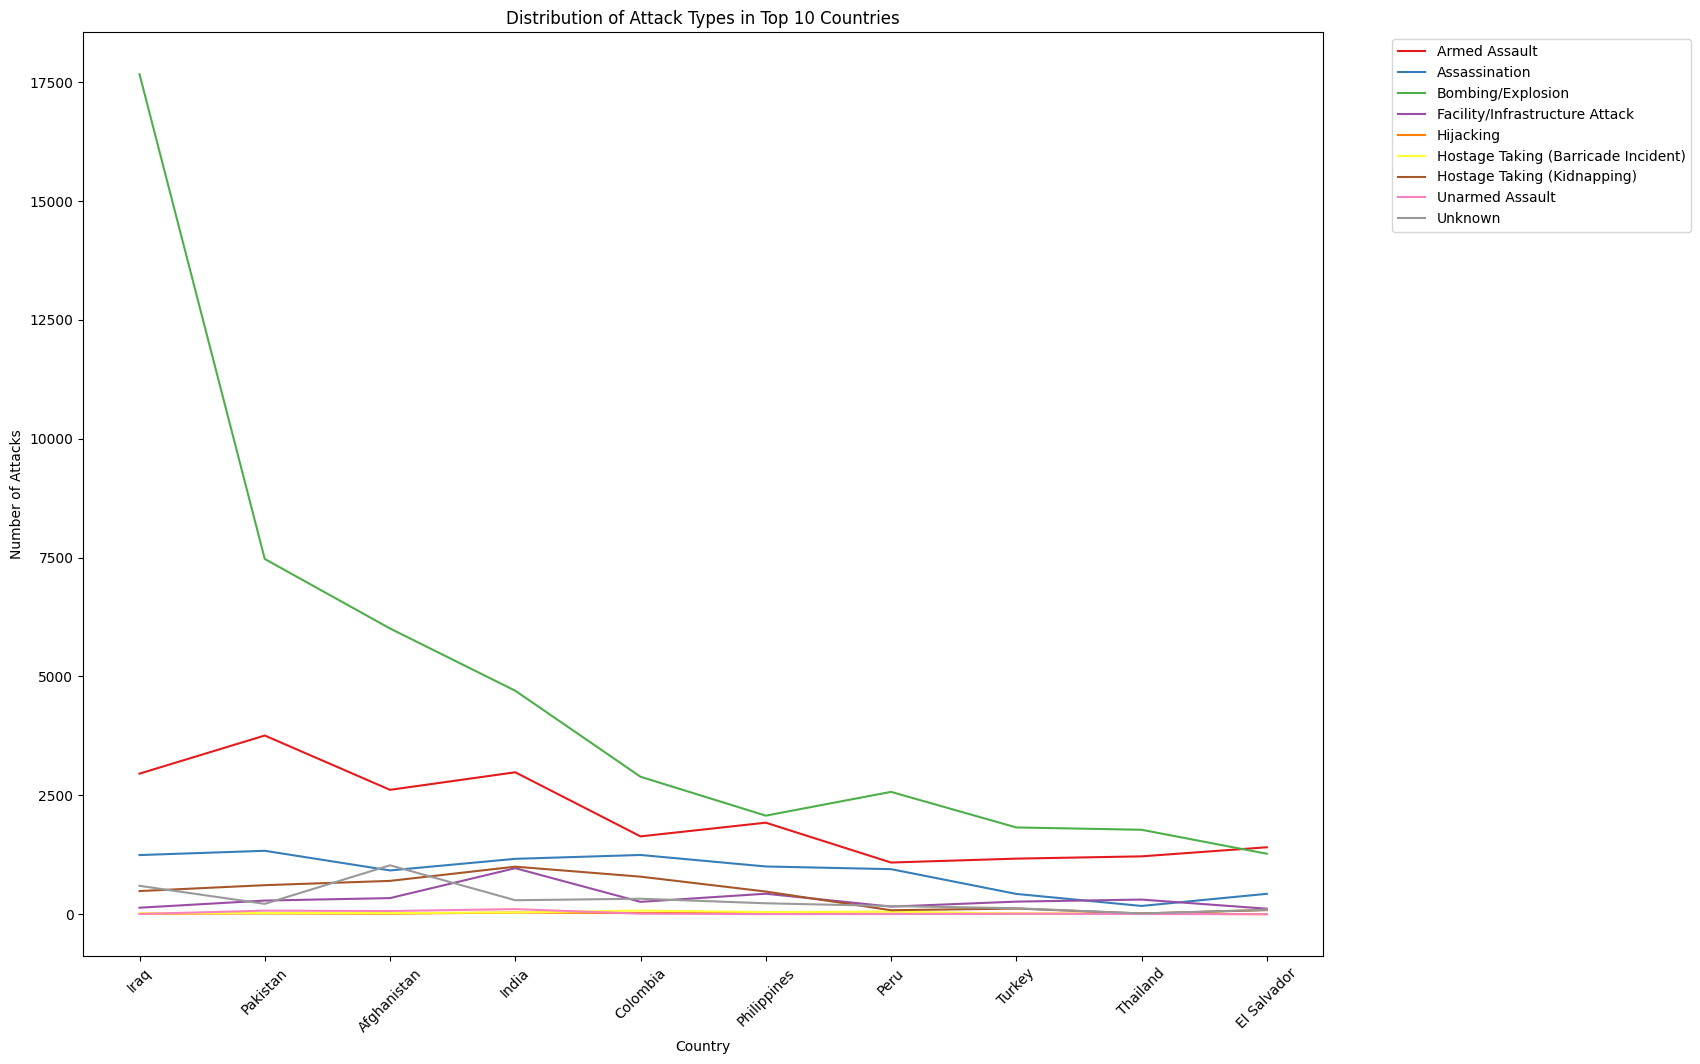

In [130]:
# Group the data by 'Country' and 'AttackType' and count the occurrences
attack_type_data = df.groupby(['Country', 'AttackType']).size().unstack().fillna(0)

# Sort countries by the total number of attacks
top_10_countries = attack_type_data.sum(axis=1).sort_values(ascending=False).head(10)

# Filter the attack_type_data to include only the top 10 countries
attack_type_data_top_10 = attack_type_data.loc[top_10_countries.index]

plt.figure(figsize=(16, 12))

# Create a color palette for the lines
color_palette = sns.color_palette("Set1", n_colors=len(attack_type_data.columns))

# Plot the line chart
for i, attack_type in enumerate(attack_type_data.columns):
    sns.lineplot(data=attack_type_data_top_10, x=attack_type_data_top_10.index, y=attack_type_data_top_10[attack_type], label=attack_type, color=color_palette[i])

plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Distribution of Attack Types in Top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.show()

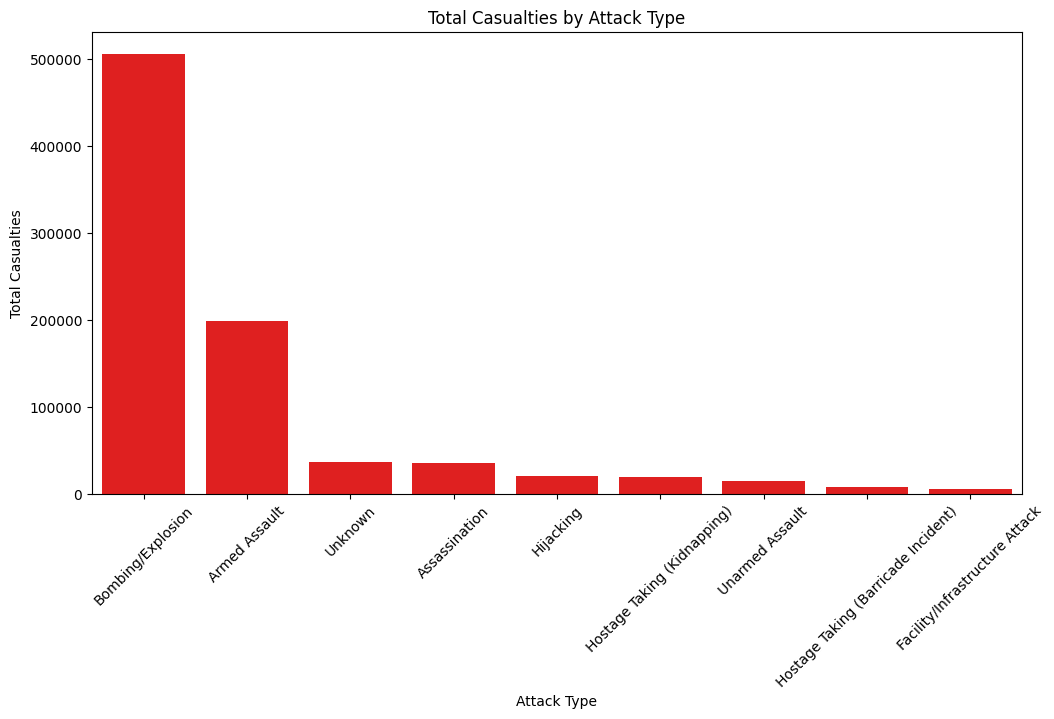

In [115]:
attack_type_casualties = df.groupby('AttackType')[['Killed', 'Wounded']].sum()
attack_type_casualties['Total_Casualties'] = attack_type_casualties['Killed'] + attack_type_casualties['Wounded']

# Sort attack types by total casualties
attack_type_casualties = attack_type_casualties.sort_values(by='Total_Casualties', ascending=False)

plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(data=attack_type_casualties, x=attack_type_casualties.index, y='Total_Casualties', color='r')

plt.xlabel('Attack Type')
plt.ylabel('Total Casualties')
plt.title('Total Casualties by Attack Type')
plt.xticks(rotation=45)

plt.show()


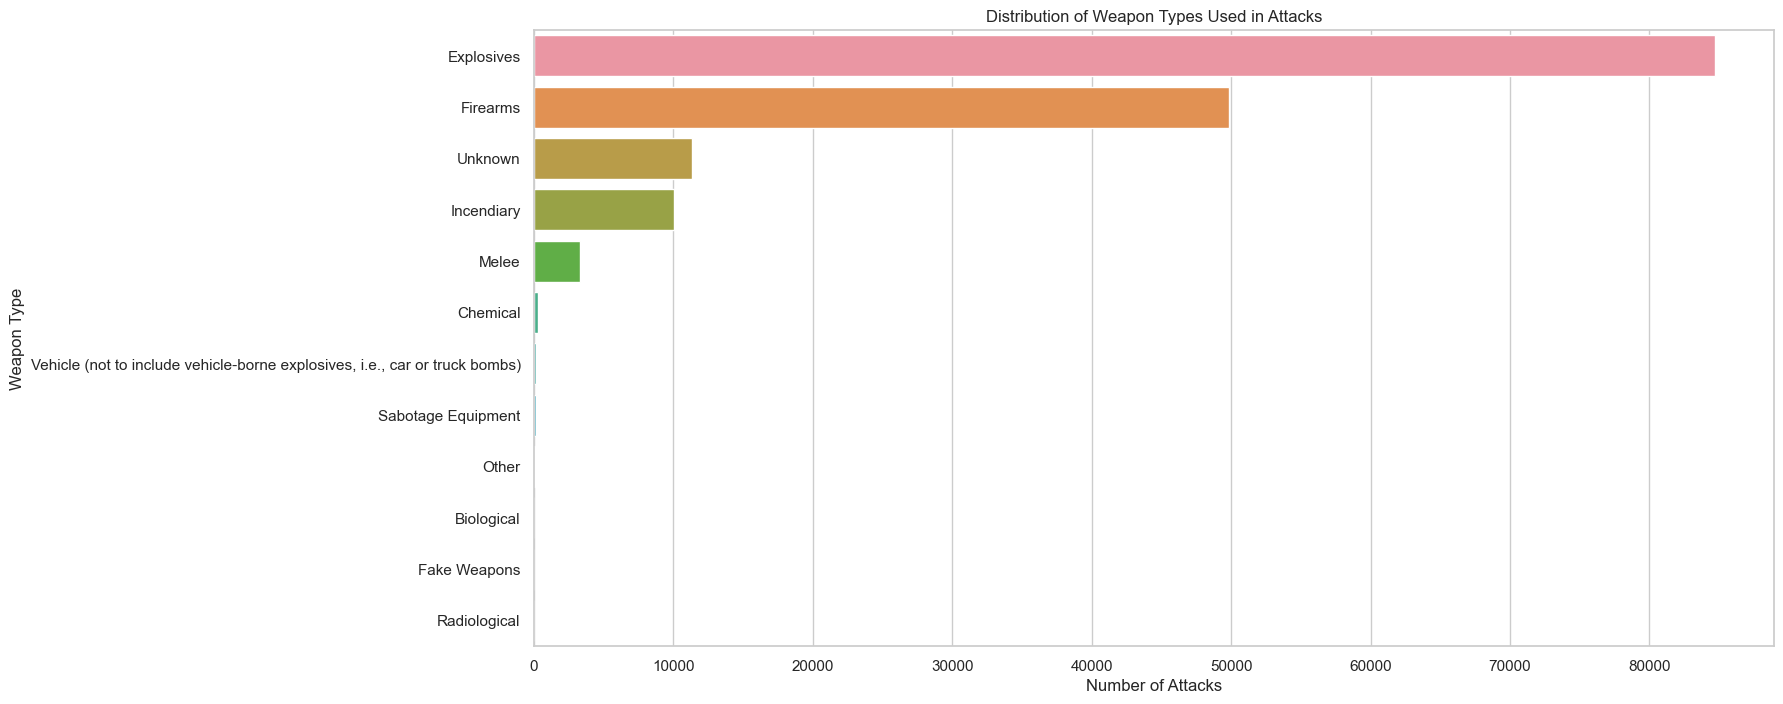

In [152]:
weapon_type_counts = df['Weapon_type'].value_counts().reset_index()
weapon_type_counts.columns = ['Weapon Type', 'Number of Attacks']
plt.figure(figsize=(16, 8))
sns.barplot(data=weapon_type_counts, x='Number of Attacks', y='Weapon Type', orient='h')
plt.xlabel('Number of Attacks')
plt.ylabel('Weapon Type')
plt.title('Distribution of Weapon Types Used in Attacks')
plt.show()

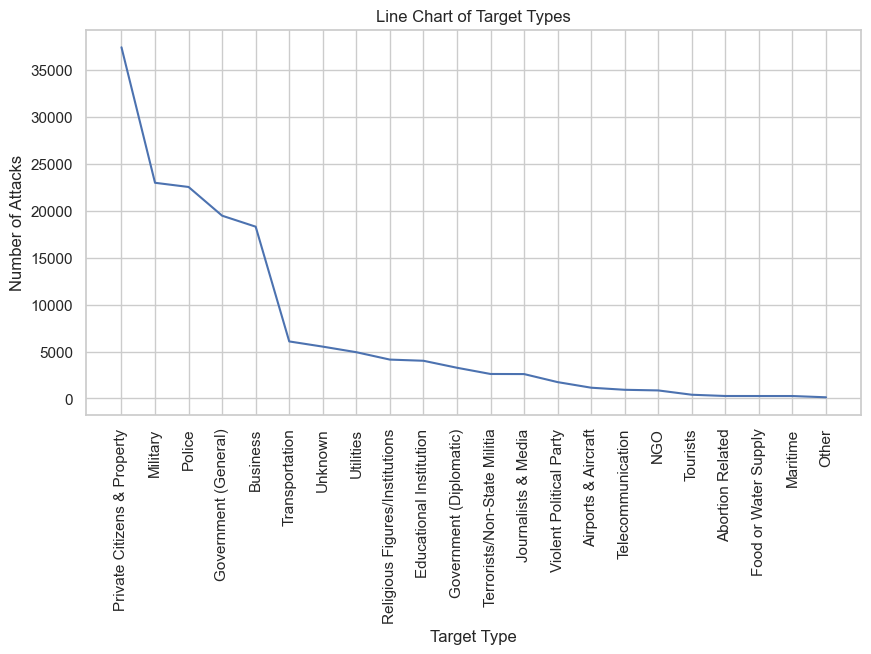

In [158]:

target_type_counts = df['Target_type'].value_counts()

plt.figure(figsize=(10, 5))
plt.plot(target_type_counts.index, target_type_counts.values)
plt.xlabel('Target Type')
plt.ylabel('Number of Attacks')
plt.title('Line Chart of Target Types')
plt.xticks(rotation=90)
plt.show()

In [166]:
df["Target"].nunique()

76809

In [173]:
# Set the threshold for infrequent occurrences
threshold = 100

# Get the counts of each unique target
target_counts = df['Target'].value_counts()

# Identify targets that occur less than the threshold
infrequent_targets = target_counts[target_counts < threshold].index

In [181]:
infrequent_targets
len(infrequent_targets)

1662

In [182]:
# Identify targets that occur less than the threshold
infrequent_targets = target_counts[target_counts < threshold].index

# Replace the infrequent targets with 'Other' category
df['Target'] = df['Target'].apply(lambda x: 'Other' if x in infrequent_targets else x)

In [183]:
df['Target'].value_counts()

Target
Other                      106347
Civilians                    5795
Unknown                      5696
Patrol                       2837
Soldiers                     2676
Checkpoint                   2653
Vehicle                      2652
Officers                     1690
Bus                          1263
Market                       1160
Convoy                       1091
Police Station               1089
Unit                         1037
Village                       959
Military Unit                 845
Office                        841
House                         789
Checkpost                     734
Mosque                        668
Post                          646
Base                          602
Headquarters                  596
Officer                       589
Civilian                      579
Bank                          568
Members                       504
Soldier                       496
School                        481
Neighborhood                  440
Buildin

In [184]:
df['Target'].nunique()

98

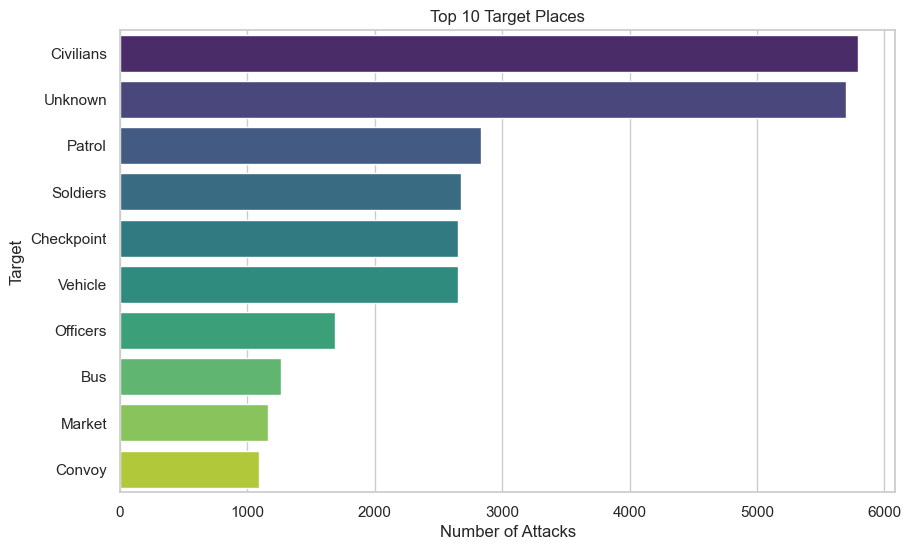

In [188]:
# Exclude the 'Other' category
top_targets = df['Target'][df['Target'] != 'Other'].value_counts().head(10)

# Create a bar plot for the top 10 targets
plt.figure(figsize=(10, 6))
sns.barplot(x=top_targets.values, y=top_targets.index, palette='viridis')
plt.xlabel('Number of Attacks')
plt.ylabel('Target')
plt.title('Top 10 Target Places')
plt.show()

In [189]:
df.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,extended,Group,Target_type,Weapon_type,Aggregated_Weapon_Type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Other,0,MANO-D,Private Citizens & Property,Unknown,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,Other,0,23rd of September Communist League,Government (Diplomatic),Unknown,Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,0,Unknown,Journalists & Media,Unknown,Unknown
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Other,0,Black Nationalists,Police,Firearms,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Other,0,Tupamaros (Uruguay),Police,Firearms,Firearms


In [195]:

group_counts = df['Group'].value_counts()
group_counts

Group
Unknown                                                                                                             76447
Taliban                                                                                                              6784
Islamic State of Iraq and the Levant (ISIL)                                                                          4704
Shining Path (SL)                                                                                                    3761
New People's Army (NPA)                                                                                              2393
Al-Shabaab                                                                                                           2375
Farabundo Marti National Liberation Front (FMLN)                                                                     2248
Revolutionary Armed Forces of Colombia (FARC)                                                                        2179
Kurdistan Workers'

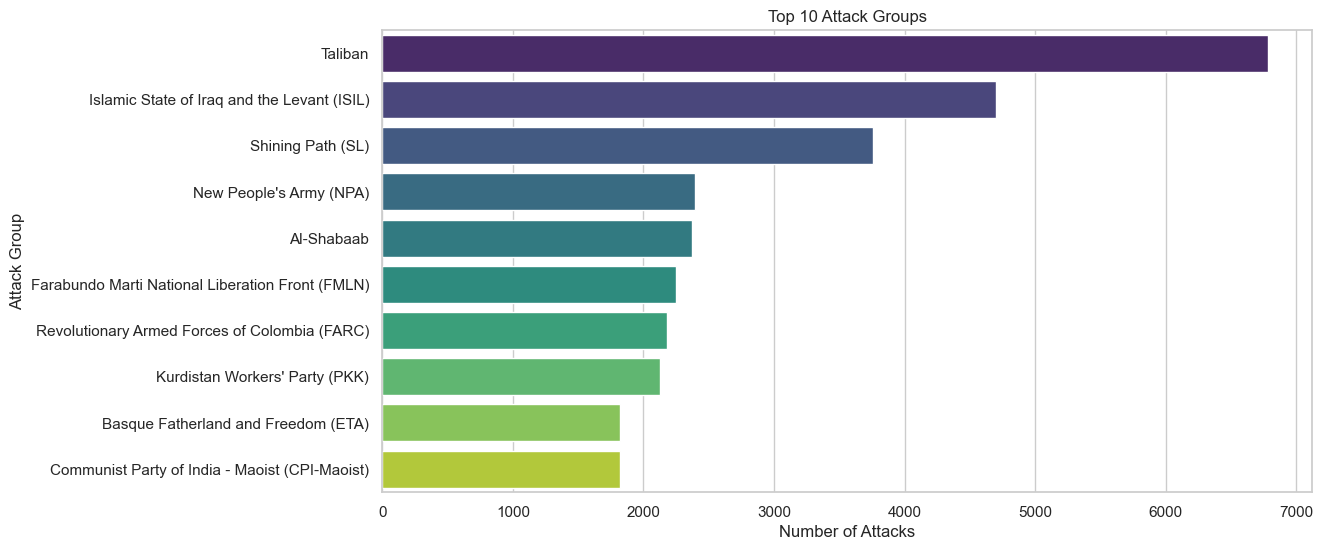

In [196]:
# Count the occurrences of each attack group
group_counts = group_counts[group_counts.index != "Unknown"]

top_n = 10
top_attack_groups = group_counts.head(top_n)

# Create a bar plot for the top N attack groups
plt.figure(figsize=(12, 6))
sns.barplot(x=top_attack_groups.values, y=top_attack_groups.index, palette='viridis')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Group')
plt.title(f'Top {top_n} Attack Groups')
plt.show()

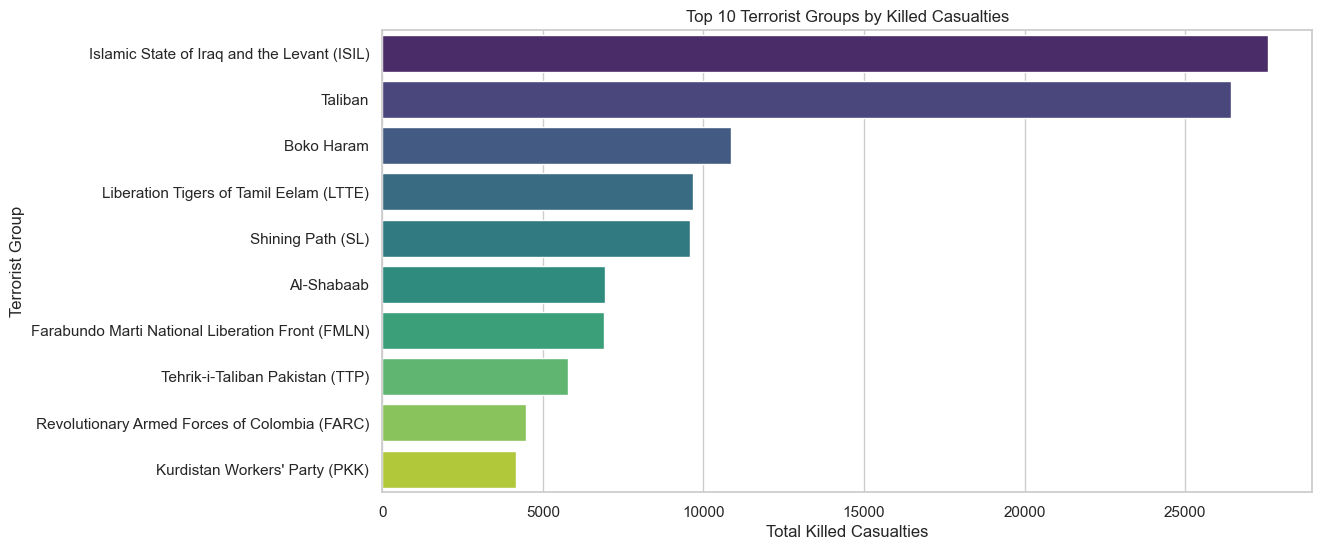

In [199]:
# Group the data by 'Group' and calculate the total killed casualties in each group
group_killed = df.groupby('Group')['Killed'].sum()

# Sort the groups by total killed casualties in descending order
group_killed = group_killed.sort_values(ascending=False)

# Select the top N groups with the most killed casualties (e.g., top 10)
group_killed = group_killed[group_killed.index != "Unknown"]
top_n = 10
top_groups_killed = group_killed.head(top_n)

# Create a bar plot to visualize the top groups by killed casualties
plt.figure(figsize=(12, 6))
sns.barplot(x=top_groups_killed.values, y=top_groups_killed.index, palette='viridis')
plt.xlabel('Total Killed Casualties')
plt.ylabel('Terrorist Group')
plt.title(f'Top {top_n} Terrorist Groups by Killed Casualties')
plt.show()